In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imdb import Cinemagoer
import time
from tqdm import tqdm
import umap

C:\Users\jakob\AppData\Local\Temp\ipykernel_13448\540188139.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dat = dat.append(pd.read_csv("watched-2022.csv",skiprows=3,dtype=str))


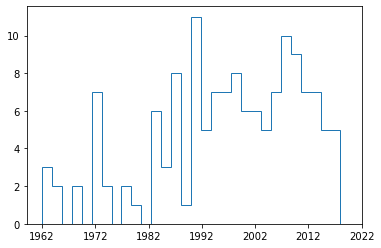

In [2]:
dat = pd.read_csv("watched-2021.csv",skiprows=3,dtype=str)
dat = dat.append(pd.read_csv("watched-2022.csv",skiprows=3,dtype=str))

years = np.array(dat["Year"]).astype(int)
names = np.array(dat["Name"]).astype(str)

a, b = np.histogram(years,bins = 15)

plt.hist(years[years<2019],bins = (max(years)-min(years))//2,histtype='step')
# plt.plot((b[1:]+b[:-1])/2,np.log(a),'.')
plt.xticks([min(years)+i*2*5 for i in range(7)])
plt.show()


In [3]:
set([i for i in range(1962,2022)]).difference(set(np.sort(years)))

{1966, 1967, 1969, 1970, 1971, 1974, 1976, 1979, 1981, 1982, 1986}

In [4]:
u_years, counts = np.unique(years,return_counts=1)

# plt.plot(u_years,counts,'.')
u_years[counts>5]

array([1973, 1991, 1997, 2019, 2021])

In [5]:
imdb = Cinemagoer()


In [6]:
movies = []

for n,y in tqdm(zip(names,years),total = len(names)):
    try:
        m = imdb.get_movie(imdb.search_movie(n)[0].movieID)
        if m["year"] != y:
            print("Found",m,"from",m["year"],"instead of",n,"from",y)
            m = imdb.get_movie(imdb.search_movie(n)[1].movieID)
            print("Now",m,"from",m["year"],"is added instead")
        movies.append(m)
    except:
        print(n,"was not found")
    time.sleep(0.5)

np.save("movie_database",np.array(movies,dtype=object),allow_pickle=True)


  7%|▋         | 12/180 [00:46<11:01,  3.94s/it]

Found Mulan from 2020 instead of Mulan from 1998
Now Mulan from 1998 is added instead


 10%|█         | 18/180 [01:14<11:08,  4.13s/it]

Found Robin Hood from 2010 instead of Robin Hood from 1973
Now Robin Hood from 2018 is added instead


 11%|█         | 19/180 [01:22<14:08,  5.27s/it]2022-04-22 17:59:54,847 CRITICAL [imdbpy] C:\Users\jakob\Anaconda3\envs\pipenv\lib\site-packages\imdb\_exceptions.py:32: IMDbParserError exception raised; args: ('invalid title: """"',); kwds: {}
NoneType: None


Serenity was not found


 22%|██▏       | 39/180 [02:35<08:28,  3.61s/it]

Found Fargo from 2014 instead of Fargo from 1996
Now Fargo from 1996 is added instead


 38%|███▊      | 69/180 [04:41<07:32,  4.08s/it]

Found Dawn of the Dead from 2004 instead of Dawn of the Dead from 1978
Now Dawn of the Dead from 1978 is added instead


 42%|████▏     | 76/180 [05:10<06:29,  3.75s/it]

Found Mother! from 2017 instead of Mother from 2009
Now Mother from 2009 is added instead


 44%|████▍     | 80/180 [05:30<07:16,  4.37s/it]

Found Suspiria from 2018 instead of Suspiria from 1977
Now Suspiria from 1977 is added instead


 57%|█████▋    | 102/180 [07:05<05:04,  3.90s/it]

Found Dune from 2021 instead of Dune from 1984
Now Dune from 1984 is added instead


 63%|██████▎   | 114/180 [07:58<04:50,  4.41s/it]

Found Hellboy from 2019 instead of Hellboy from 2004
Now Hellboy from 2004 is added instead


 79%|███████▉  | 143/180 [09:57<02:19,  3.77s/it]

Found Paprika from 1991 instead of Paprika from 2006
Now Paprika from 2006 is added instead


100%|██████████| 180/180 [12:27<00:00,  4.15s/it]


In [8]:
loaded = np.load("movie_database.npy",allow_pickle=True)

In [7]:
actors = []
for m in movies:
    try:
        nms = [a['name'] for a in m["actors"]]
        actors.append(np.array(nms))
    except:
        print("No actors found in",m)
        dod = m
        actors.append(np.array([]))
actors = np.hstack(np.array(actors))

No actors found in A Man and A Camera


C:\Users\jakob\AppData\Local\Temp\ipykernel_13448\684155662.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  actors = np.hstack(np.array(actors))


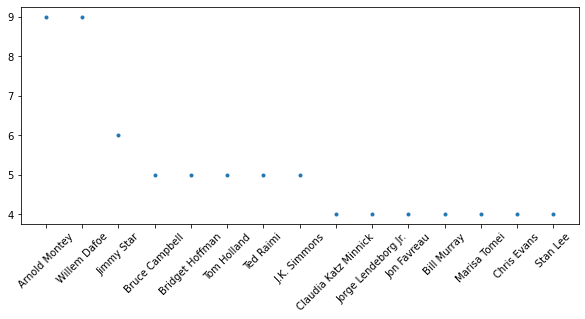

In [8]:
u_actors, counts = np.unique(actors,return_counts=1)

u_actors = u_actors[np.argsort(counts)][::-1]
counts = np.sort(counts)[::-1]
plt.figure(figsize=(10, 4))
plt.plot(u_actors[:15],counts[:15],'.')
plt.xticks(rotation=45)
plt.show()
# actors[0]['name']

In [10]:

directors = []
for m in movies:
    try:
        directors.append(m['director']['name'])
    except:
        try:
            directors.append([d['name'] for d in m['directors']])
        except:
            print(m)


# directors.append("Dario Argento")
# directors.append("David Lynch")
directors.append("Yeon Sang-ho")
# directors.append("Guillermo Del Toro")
directors.append("Rainer Werner Fassbinder")
directors.append("Peter Jackson")
directors = np.hstack(np.array(directors))

Hellbound
World on a Wire
The Beatles: Get Back


C:\Users\jakob\AppData\Local\Temp\ipykernel_13448\3931010358.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  directors = np.hstack(np.array(directors))


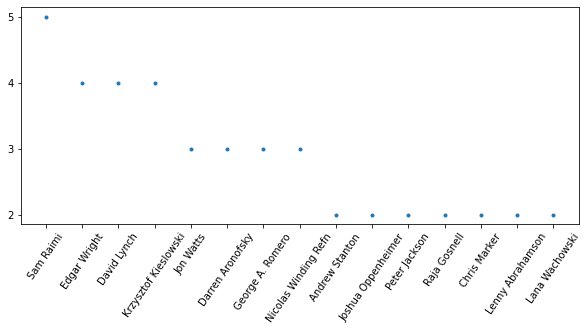

Directors you have watched two or more movies from:
5 Sam Raimi
4 Edgar Wright
4 David Lynch
4 Krzysztof Kieslowski
3 Jon Watts
3 Darren Aronofsky
3 George A. Romero
3 Nicolas Winding Refn
2 Andrew Stanton
2 Joshua Oppenheimer
2 Peter Jackson
2 Raja Gosnell
2 Chris Marker
2 Lenny Abrahamson
2 Lana Wachowski
2 Jim Jarmusch
2 Ridley Scott
2 Guillermo del Toro
2 Ethan Coen
2 Robert Rodriguez
2 Kar-Wai Wong
2 Michael Haneke
2 Ron Howard
2 Sergio Leone
2 Bong Joon Ho
2 Stanley Kubrick
2 Steven Spielberg
2 Joe Dante
2 Joel Coen
2 Tim Burton
2 Barry Sonnenfeld
2 Satoshi Kon


In [11]:
u_directors, counts = np.unique(directors,return_counts=1)
u_directors = u_directors[np.argsort(counts)][::-1]
counts = np.sort(counts)[::-1]

plt.figure(figsize=(10, 4))
plt.plot(u_directors[:15],counts[:15],'.')
plt.xticks(rotation=55)
plt.yticks([i for i in range(2,6)])
plt.show()
print("Directors you have watched two or more movies from:")
for d, c in zip(u_directors[counts>1],counts[counts>1]):
    print(c,d)
    

In [12]:

countries = []
for m in movies:
    try:
        countries.append(m['country'])
    except:
        try:
            countries.append(m['countries'])
            # countries.append([d for d in m['directors']])
        except:
            theamd = m
            print(m)

countries.append("United States")
countries = np.hstack(np.array(countries))


The Amnesia Fortnight Movie


C:\Users\jakob\AppData\Local\Temp\ipykernel_13448\2507399231.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  countries = np.hstack(np.array(countries))


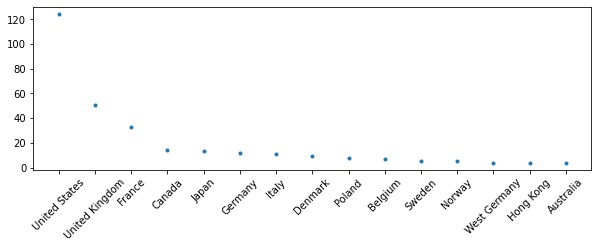

In [13]:
u_countries, counts = np.unique(countries,return_counts=1)
u_countries = u_countries[np.argsort(counts)][::-1]
counts = np.sort(counts)[::-1]

plt.figure(figsize=(10, 3))
plt.plot(u_countries[:15],counts[:15],'.')
plt.xticks(rotation=45)
plt.show()

In [14]:
ratings = []
for m in movies:
    try:
        ratings.append(m['rating'])
    except:
        ratings.append(7.3)

        print("Could not find ratings for:",m)

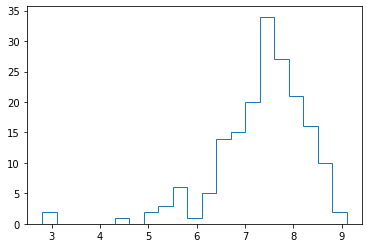

In [15]:
plt.hist(ratings, bins = 21,histtype="step")
plt.show()

In [16]:
asort = np.argsort(ratings)

print("Best movies:",movies[asort[-1]],movies[asort[-2]],movies[asort[-3]],"\nWorst movies:",movies[asort[0]],movies[asort[1]],movies[asort[2]],sep="\n")


Best movies:
The Beatles: Get Back
Schindler's List
Star Wars: Episode V - The Empire Strikes Back

Worst movies:
Cats
Troll 2
Samurai Cop


In [186]:
movies[0].keys()

#TO CHECK
# runtimes, cinematographer


['original title',
 'localized title',
 'cast',
 'genres',
 'runtimes',
 'countries',
 'country codes',
 'language codes',
 'color info',
 'aspect ratio',
 'sound mix',
 'certificates',
 'original air date',
 'rating',
 'votes',
 'cover url',
 'imdbID',
 'plot outline',
 'languages',
 'title',
 'year',
 'kind',
 'director',
 'writer',
 'producer',
 'composer',
 'cinematographer',
 'editor',
 'editorial department',
 'casting director',
 'production design',
 'art direction',
 'production manager',
 'art department',
 'sound crew',
 'visual effects',
 'camera and electrical department',
 'animation department',
 'music department',
 'miscellaneous crew',
 'thanks',
 'akas',
 'production companies',
 'distributors',
 'special effects',
 'other companies',
 'plot',
 'canonical title',
 'long imdb title',
 'long imdb canonical title',
 'smart canonical title',
 'smart long imdb canonical title',
 'full-size cover url']